In [20]:
#importing significant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
#uploading dataset 
df= pd.read_excel("iriss.csv.xlsx")

Data Preprocessing

In [ ]:
#checking first 5 values of the iriss dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Visualisation

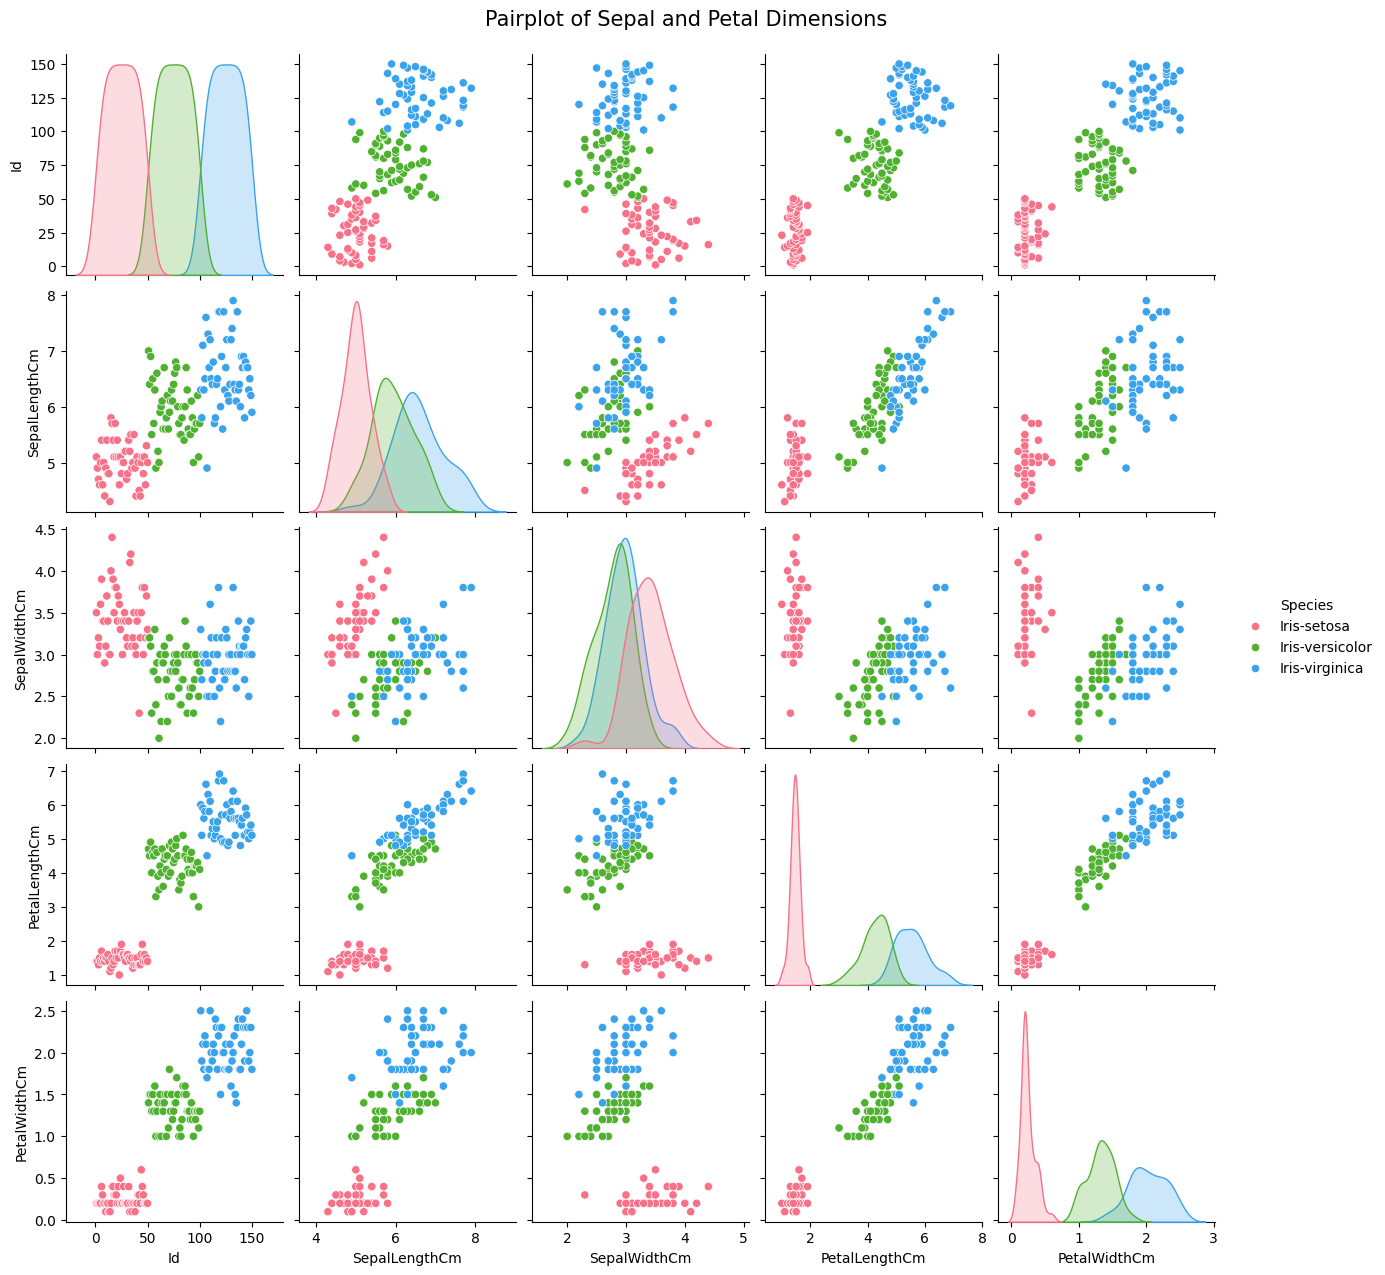

In [ ]:
#Pairplot for Sepal and Petal dimensions
sns.pairplot(df, hue="Species", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Sepal and Petal Dimensions", y=1.02, fontsize=15)
plt.show()

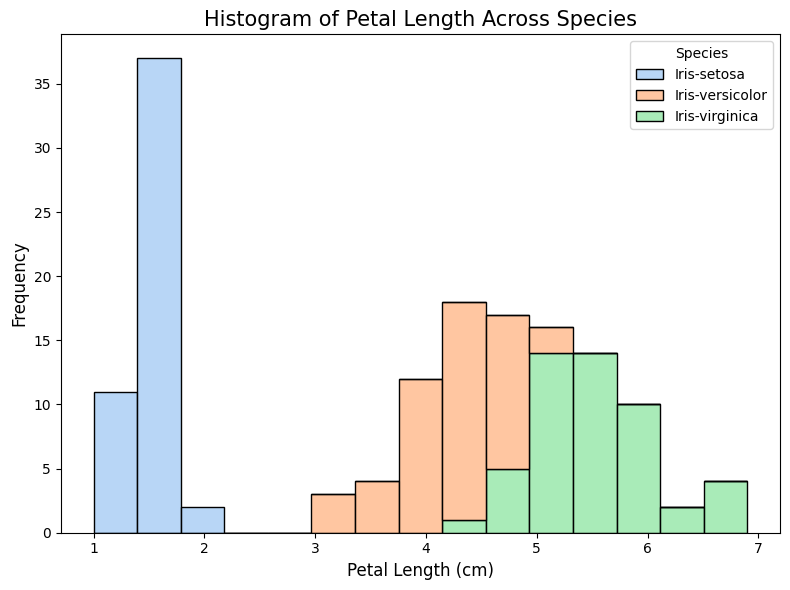

In [15]:
# Histogram of Petal Length for all species
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="PetalLengthCm", hue="Species", multiple="stack", bins=15, palette="pastel")
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Petal Length Across Species", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


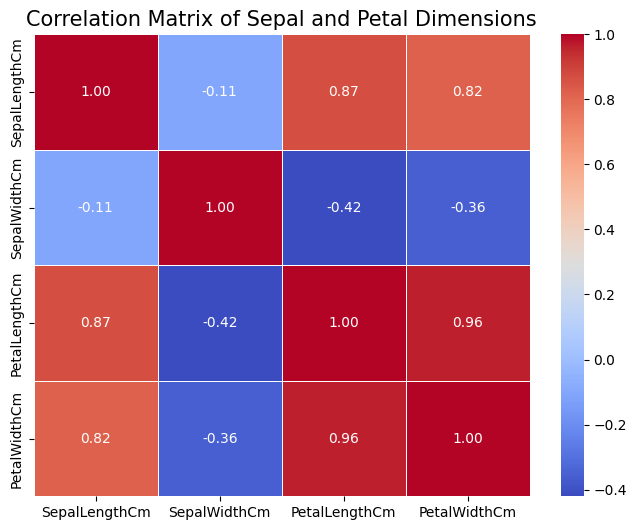

In [16]:
numeric_df = df.drop(columns=["Id", "Species"])

# Generating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sepal and Petal Dimensions", fontsize=15)
plt.show()

In [18]:
#Setting independent and dependent variable
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Train Logistic Regression
logistic_model = LogisticRegression(penalty='l2', C=0.1, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Results
Accuracy: 0.87
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.70      0.78        10
 Iris-virginica       0.75      0.90      0.82        10

       accuracy                           0.87        30
      macro avg       0.88      0.87      0.87        30
   weighted avg       0.88      0.87      0.87        30



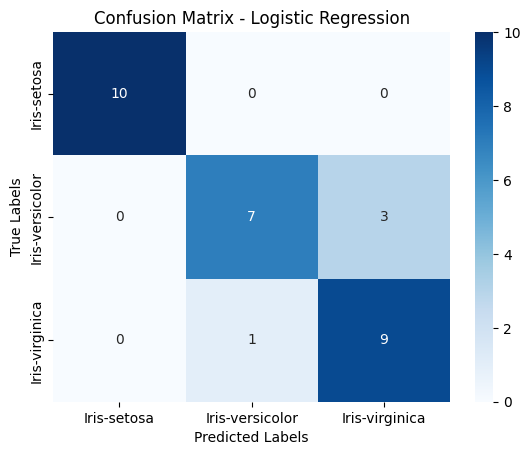

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic, labels=logistic_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [35]:
# Trainning Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)

# Making predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluating Decision Tree
print("Decision Tree Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Results
Accuracy: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



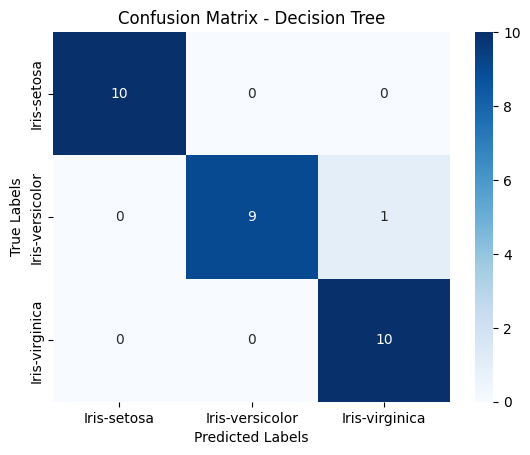

In [39]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree_model.classes_)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [37]:
# Training KNN
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating KNN
print("K-Nearest Neighbors Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Results
Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



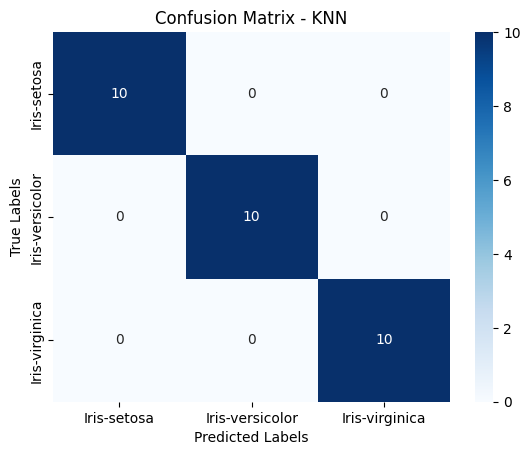

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [31]:
# Training Random Forest
forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state=42)
forest_model.fit(X_train, y_train)

# Making predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluating Random Forest
print("Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.2f}")
print(classification_report(y_test, y_pred_forest))


Random Forest Results
Accuracy: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



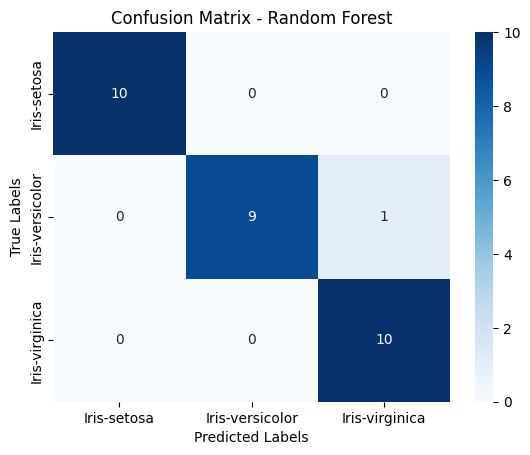

In [40]:
# Confusion Matrix
cm_forest = confusion_matrix(y_test, y_pred_forest, labels=forest_model.classes_)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues', xticklabels=forest_model.classes_, yticklabels=forest_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()